# Sage vs TDB2

This benchmark compares the performance of **TDB2 query engine** vs **Sage query engine** on **WatDiv**: a dataset of roughly 10 millions of triples and 192 SPARQL queries.

It was run on a Macbook pro 2021 running macOS Ventura version 13.0.1; with a M1 Pro CPU 10 cores; GPU 16 cores; 16 Go RAM; 1 To SSD.

The results of the benchmark were saved in `.csv` files. This rest of this notebook only aims to display them in a pleasant manner.

In [38]:
!pip3 install pandas --quiet

import pandas as pd
import os

title_to_csv = {}
for filename in os.listdir():
    if filename.endswith(".csv"):
        try: 
            title_to_csv[filename] = pd.read_csv(filename)
        except:
            print(f"Error while reading {filename}, skipping…")

print(f"Just read {len(title_to_csv)} files…")


[notice] A new release of pip available: 22.3.1 -> 23.0.1
[notice] To update, run: python3.11 -m pip install --upgrade pip
Error while reading WatdivBenchmark-Sage force order-Short.csv, skipping…
Just read 5 files…



[notice] A new release of pip available: 22.3.1 -> 23.0.1
[notice] To update, run: python3.11 -m pip install --upgrade pip
object


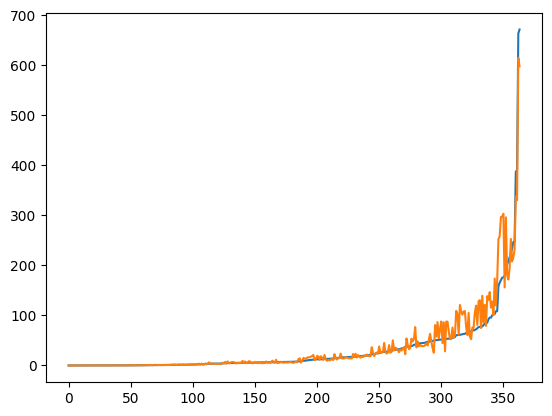

In [39]:
!pip3 install matplotlib --quiet
## %matplotlib 

import matplotlib.pyplot as plt

# print (title_to_csv)

print(title_to_csv["WatdivBenchmark-Sage-Short.csv"]['Score'].dtypes)
if title_to_csv["WatdivBenchmark-Sage-Short.csv"]['Score'].dtypes != "float64":
    title_to_csv["WatdivBenchmark-Sage-Short.csv"]['Score'] = (title_to_csv["WatdivBenchmark-Sage-Short.csv"])['Score'].str.replace(',', '.').astype(float)
    
if title_to_csv["WatdivBenchmark-TDB-Short.csv"]['Score'].dtypes != "float64":
    title_to_csv["WatdivBenchmark-TDB-Short.csv"]['Score'] = (title_to_csv["WatdivBenchmark-TDB-Short.csv"])['Score'].str.replace(',', '.').astype(float)

title_to_csv["WatdivBenchmark-Sage-Short.csv"]['Score TDB'] = title_to_csv["WatdivBenchmark-TDB-Short.csv"]['Score']
title_to_csv["WatdivBenchmark-Sage-Short.csv"].sort_values(by=['Score'], inplace=True)


title_to_csv["WatdivBenchmark-Sage-Short.csv"].reset_index(drop = True, inplace = True)


plt.plot(title_to_csv["WatdivBenchmark-Sage-Short.csv"].index,
         title_to_csv["WatdivBenchmark-Sage-Short.csv"]["Score"])

plt.plot(title_to_csv["WatdivBenchmark-Sage-Short.csv"].index,
         title_to_csv["WatdivBenchmark-Sage-Short.csv"]['Score TDB'])

plt.show()